In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#use scipy as needed
import scipy
from scipy import sparse as sp
from scipy import fft
import time

In [3]:
def part3q1(y0,alpha,beta,b,c,tf=200,Nt=800,err=1e-6,method="RK45"):
    """
    Part 3 question 1
    Simulate system of 2n nonlinear ODEs

    Input:
    y0: Initial condition, size 2*n array
    alpha,beta,b,c: model parameters
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)

    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x 2*n array containing y at
            each time step including the initial condition.
    """
    
    #Set up parameters, arrays

    n = y0.size//2
    tarray = np.linspace(0,tf,Nt+1)
    yarray = np.zeros((Nt+1,2*n))
    yarray[0,:] = y0


    def RHS(t,y):
        """
        Compute RHS of model
        """
        #add code here
        u = y[:n];v=y[n:]
        r2 = u**2+v**2
        nu = r2*u
        nv = r2*v
        cu = np.roll(u,1)+np.roll(u,-1)
        cv = np.roll(v,1)+np.roll(v,-1)

        dydt = alpha*y
        dydt[:n] += beta*(cu-b*cv)-nu+c*nv+b*(1-alpha)*v
        dydt[n:] += beta*(cv+b*cu)-nv-c*nu-b*(1-alpha)*u

        return dydt


    sol = solve_ivp(RHS, (tarray[0],tarray[-1]), y0, t_eval=tarray, method=method,atol=err,rtol=err)
    yarray = sol.y.T 
    return tarray,yarray

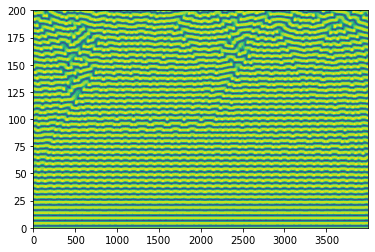

In [19]:
display = True

#Set parameters
beta = (25/np.pi)**2
alpha = 1-2*beta
b =-1.5
n = 4000 # default 4000

tf = 200
Nt = 800

#Set initial conidition
L = (n-1)/np.sqrt(beta)
k = 40*np.pi/L
a0 = np.linspace(0,L,n)
A0 = np.sqrt(1-k**2)*np.exp(1j*a0)
y0 = np.zeros(2*n)
y0[:n]=1+0.2*np.cos(4*k*a0)+0.3*np.sin(7*k*a0)+0.1*A0.real

#---Example code for computing solution, use/modify/discard as needed---#
c_vals = np.array([1.2, 1.3])
u_list = []
for c in c_vals:
    if c == 1.3:
        t,y = part3q1(y0,alpha,beta,b,c,tf=20,Nt=2,method='RK45') #for transient, modify tf and other parameters as needed
        y0_ = y[-1,:]
        t,y = part3q1(y0_,alpha,beta,b,c,method='RK45',err=1e-6)
        u,v = y[:,:n],y[:,n:]
        u_list.append(u)
    else:
        t1,y1 = part3q1(y0,alpha,beta,b,c,tf=20,Nt=2,method='RK45') #for transient, modify tf and other parameters as needed
        y01 = y1[-1,:]
        t1,y1 = part3q1(y01,alpha,beta,b,c,method='RK45',err=1e-6)
        u1,v1 = y1[:,:n],y1[:,n:]
        u_list.append(u1)

if display:
    plt.figure()
    plt.contourf(np.arange(n),t,u,20)


In [20]:
#-------------------------------------------#

#Add code here

x = u[:,100:-99]
Nt_1, m = x.shape
times = np.linspace(0, tf, Nt_1)


Text(0, 0.5, 'u(t)')

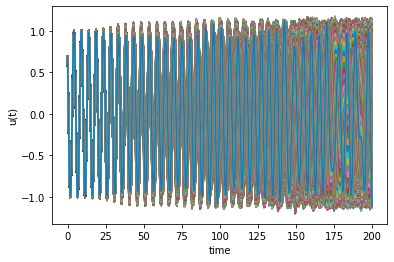

In [21]:
#  Time plot
plt.figure()
for i in range(m):
    plt.plot(t, x[:,i])
plt.xlabel('time')
plt.ylabel('u(t)')

Text(0, 0.5, 'u_i')

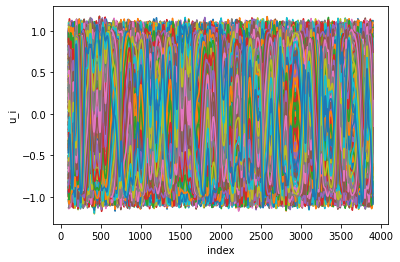

In [22]:

#  Space plot
plt.figure()
for j in range(Nt_1):
    plt.plot(np.arange(100, n-99), x[j])
plt.xlabel('index')
plt.ylabel('u_i')

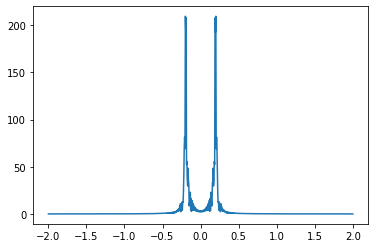

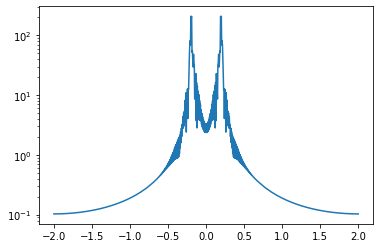

In [23]:
#  FFT analysis

Sf = np.fft.fftshift(np.abs(np.fft.fft(x, axis=0)))
f = np.fft.fftshift(np.fft.fftfreq(Nt_1, t[1]-t[0]))

plt.figure()
plt.plot(f, Sf[:, 0])
plt.figure()
plt.semilogy(f, Sf[:, 0])


2.1359552056245934


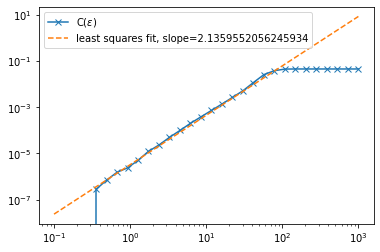

In [44]:
#  Correlation dimension

D = scipy.spatial.distance.pdist(x)
eps = np.logspace(-1, 3, 30)
C = np.array([D[D < ep].size*2/(m*(m-1)) for ep in eps])

plt.figure()
plt.loglog(eps, C, marker = 'x', label=r'C($\epsilon$)')

eps_fit = np.logspace(0, 2, 20)
C_fit = np.array([D[D < ep].size*2/(n*(n-1)) for ep in eps_fit])
d, p_corr = np.polyfit(np.log(eps_fit), np.log(C_fit), 1)
print(d)

plt.loglog(eps, np.exp(p_corr)*(eps**d), linestyle='--', label=f'least squares fit, slope={d}')
plt.legend()

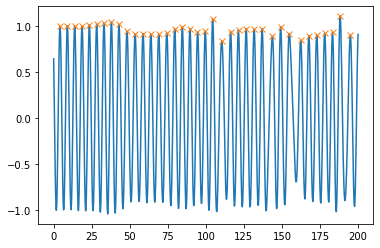

In [10]:
#  Finding max

dx = np.diff(x[:,0])
d2x  = dx[:-1]*dx[1:]
ind_max = np.argwhere(d2x<0)
x_max = x[ind_max[1::2]+1,0]

plt.figure()
plt.plot(t, x[:,0])
plt.plot(t[ind_max[1::2]+1], x_max, 'x')


In [ ]:
#  Orbit diagram for oscillations

plt.plot(x)

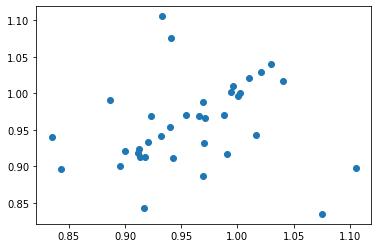

In [11]:
#  Unimodal mapping

plt.scatter(x_max[:-1,0], x_max[1:,0])